<a href="https://colab.research.google.com/github/PaulaBDS/Clase2/blob/master/Metodos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Metodos**


In [0]:
import numpy as np

# A continuación se presentan las funciones que permitirán resolver los ejercicios 3, 4 y 5 del informe.
# Por simplicidad y conveniencia del código, se considerará ,además de que GMm=1, que la masa del planeta m=1,
# y con respecto a los tiempos en las funciones pasos, impondremos que t=0, es decir, no se considerará el tiempo en los pasos, solo se considerará el dt.

In [0]:
def ecuacionDeMovimiento(estado, t=0, m=1):
  
  """
  Implementa la ecuación de movimiento, como sistema de ecuaciones de
  primer orden. D = estado (vector)
  Escribiendo D' = f(t,D), retorna el valor de f(t, D) (vector)
  """
  
  r = np.sqrt(estado[0]**2 + estado[1]**2)  #expresamos distancia de la estrella al planeta en funcion de las coord x e y 
  
  dxdt = estado[2]                          #calculamos la derivada de cada componente del vector estado
  dydt = estado[3]
  dvxdt = -estado[0]/(r**3)
  dvydt = -estado[1]/(r**3)
  
  ecMov = [dxdt, dydt, dvxdt, dvydt]        #escribimos la ecuación de movimiento
  
  return np.array(ecMov)                    #la entregamos como un vector (arreglo)

In [0]:
def pasoEuler(ecMov,dt, t=0):
  
  """
  Calcula el paso para el método de Euler
  """  
  return dt*ecMov                           # en este caso la funcion paso es simlemente el dt multiplicado por la
                                            # ecuacion de movimiento que contiene las derivadas de cada coordenada del vector estado

In [0]:
def pasoHeun(dt,estado,ecMov, t=0):
  
  """
  Calcula el paso para el método de Heun
  """
  return (1/2)*dt*(ecMov + pasoEuler(dt,ecMov+pasoEuler(ecMov,dt)))
                

In [0]:
def pasoRK4(dt,ecMov,estado,t=0):
  
  """
  Calcula el paso para el método RK4
  """
  k1 = ecMov
  k2 = ecuacionDeMovimiento(estado+(dt/2)*k1)
  k3 = ecuacionDeMovimiento(estado+(dt/2)*k2)
  k4 = ecuacionDeMovimiento(estado+dt*k3)
  
  k = k1 + 2*k2 + 2*k3 + k4
  
  return (dt/6)*k
  

In [0]:
def solveEuler(e0, ecMov, dt, T):
  
  """
  Recibe una condición inicial, la ecuación de movimiento, un paso dt
  y un tiempo final.
  Retorna la trayectoria del estado en los tiempos hasta T
  Usa su respectiva función de paso (no lo calcule acá)
  """
  
  N = int(T/dt)                             # primero definimos el numero de particiones del intervalo de tiempo [0,T]
  
  estados = np.empty((N,4))                 # creamos un arreglo de dos dimensiones (matriz) de N filas y 4 columnas
                                            # cada fila corresponde a un estado y cada columna corresponde a x,y,vx,vy respectivamente
  estados[0] = e0
  print (estados[0])
  
  for i in range (1,N):
    estados[i] = estados[i-1] + pasoEuler(ecMov,dt)      # con esto indicamos que la fila i se cambia usando el metetodo de Euler Progresivo
    ecMov = ecuacionDeMovimiento(estados[i])
  return estados                                         # devuelve la matriz de estados ya modificada
                                                         # el procedimiento es analogo para los demás métodos
                                                         



In [0]:
def solveHeun(e0, ecMov, dt, T):
  
  """
  Recibe una condición inicial, la ecuación de movimiento, un paso dt
  y un tiempo final.
  Retorna la trayectoria del estado en los tiempos hasta T
  Usa su respectiva función de paso (no lo calcule acá)
  """

  N = int(T/dt)
  estados = np.empty((N,4))
  estados[0] = e0
  print (estados[0])
  for i in range (1,N):
    estados[i] = estados[i-1] + pasoHeun(dt,estados[i-1],ecMov)
    ecMov = ecuacionDeMovimiento(estados[i])
  return estados

In [0]:
def solveRK4(e0, ecMov, dt, T):
  
  """
  Recibe una condición inicial, la ecuación de movimiento, un paso dt
  y un tiempo final.
  Retorna la trayectoria del estado en los tiempos hasta T
  Usa su respectiva función de paso (no lo calcule acá)
  """
  
  N = int(T/dt)
  estados = np.empty((N,4))
  estados[0] = e0
  print (estados[0])
  for i in range (1,N):
    estados[i] = estados[i-1] + pasoRK4(dt,ecMov,estados[i-1])
    ecMov = ecuacionDeMovimiento(estados[i])
  return estados

In [0]:
def energiaTotal(x, y, vx, vy):
  
  """
  Calcula la energía total del sistema en las condiciones actuales.
  Retorna el valor de la energía total en el punto
  """
  
  # considerando que la masa del planeta m es 1 y que GMm=1:
    
  v = np.linalg.norm(np.array([vx,vy]))       #definimos la velocidad al cuadrado que sería la norma del vector (vx,vy)
  
  r = np.linalg.norm(np.array([x,y]))          #definimos la distancia del la estrella al planeta como la norma del vector (x,y) 
  
  K = (1/2)*v**2
  U = -1/r
  
  return K + U

[10.   0.   0.   0.3]
[10.   0.   0.   0.3]


Text(0, 0.5, 'Movimiento en y')

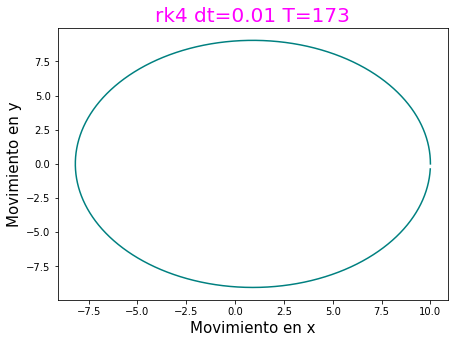

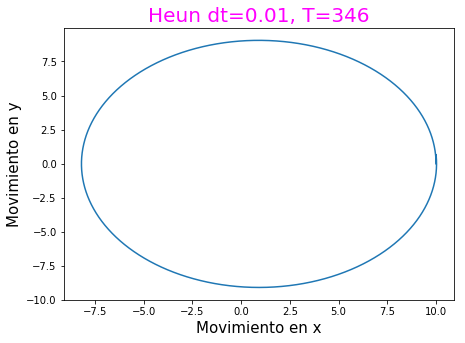

In [213]:
#import sys
#del sys.modules['metodos']
#import numpy as np
#import matplotlib.pyplot as plt
#from metodos import *

import matplotlib.pyplot as plt

# para encontrar una aproximación del periodo se graficará con euler progresvo con un dt pequeño

estado = np.array([10,0,0,0.3])

a = ecuacionDeMovimiento(estado)

e0 = np.array([10.0,0,0,0.3])

b= solveRK4(e0,a,0.01,171)

d= solveHeun(e0,a,0.01,346)

plt.figure(figsize=(7,5))
plt.plot(b[:,0],b[:,1], c='teal')                      # este slicing indica que solo se están graficando las columnas que corresponden a x e y
plt.title('rk4 dt=0.01 T=173', size=20, color='magenta')
plt.xlabel('Movimiento en x', size=15)
plt.ylabel('Movimiento en y', size=15)

plt.figure(figsize=(7,5))
plt.plot(d[:,0], d[:,1])
plt.title('Heun dt=0.01, T=346', size=20, color='magenta')
plt.xlabel('Movimiento en x', size=15)
plt.ylabel('Movimiento en y', size=15)

[10.   0.   0.   0.3]
[10.   0.   0.   0.3]
[10.   0.   0.   0.3]
[10.   0.   0.   0.3]


Text(0, 0.5, 'Movimiento en y')

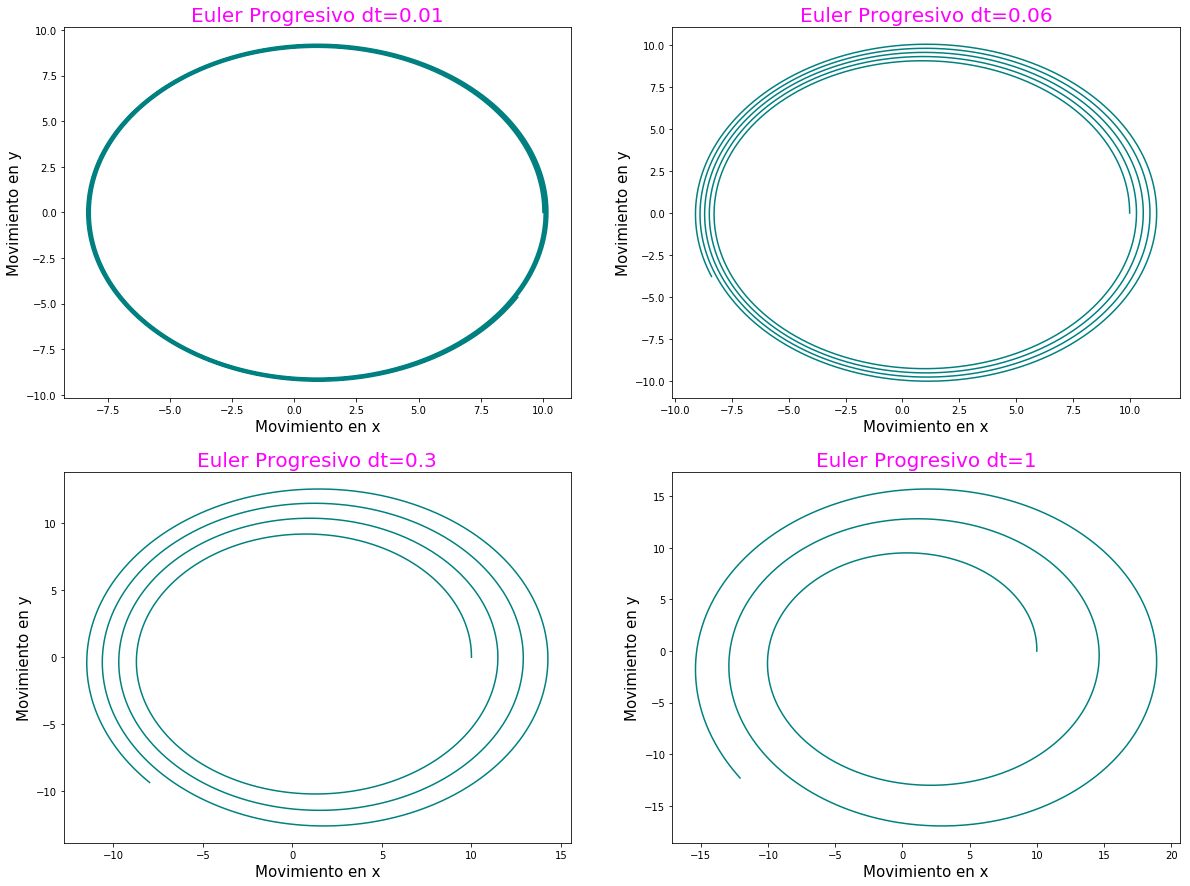

In [214]:
# ahora con el T ya aproximado, se analizarán los métodos en un tiempo 5T

# se define el estado, la ecuacion de movimiento y las condiciones iniales

estado = np.array([10,0,0,0.3])

a = ecuacionDeMovimiento(estado)

e0 = np.array([10.0,0,0,0.3])

# se crean distintos solvers para disitntos dt

b= solveEuler(e0,a,0.01,860)

c = solveEuler(e0,a,0.06,860)

d= solveEuler(e0,a,0.3,860)

f = solveEuler(e0,a,1,860)

# ploteando 

fig, ax = plt.subplots(figsize = (20,15), nrows=2, ncols = 2)

ax[0,0].plot(b[:,0],b[:,1], c='teal')                        # este slicing indica que solo se están graficando las columnas que corresponden a x e y
ax[0,0].set_title('Euler Progresivo dt=0.01', size=20, color='magenta')
ax[0,0].set_xlabel('Movimiento en x', size=15)
ax[0,0].set_ylabel('Movimiento en y', size=15)

ax[0,1].plot(c[:,0],c[:,1], c='teal')
ax[0,1].set_title('Euler Progresivo dt=0.06', size=20, color='magenta')
ax[0,1].set_xlabel('Movimiento en x', size=15)
ax[0,1].set_ylabel('Movimiento en y', size=15)


ax[1,0].plot(d[:,0],d[:,1], c='teal')                        
ax[1,0].set_title('Euler Progresivo dt=0.3', size=20, color='magenta')
ax[1,0].set_xlabel('Movimiento en x', size=15)
ax[1,0].set_ylabel('Movimiento en y', size=15)

ax[1,1].plot(f[:,0],f[:,1], c='teal')
ax[1,1].set_title('Euler Progresivo dt=1', size=20, color='magenta')
ax[1,1].set_xlabel('Movimiento en x', size=15)
ax[1,1].set_ylabel('Movimiento en y', size=15)




[10.   0.   0.   0.3]
[10.   0.   0.   0.3]
[10.   0.   0.   0.3]
[10.   0.   0.   0.3]


Text(0, 0.5, 'Movimiento en y')

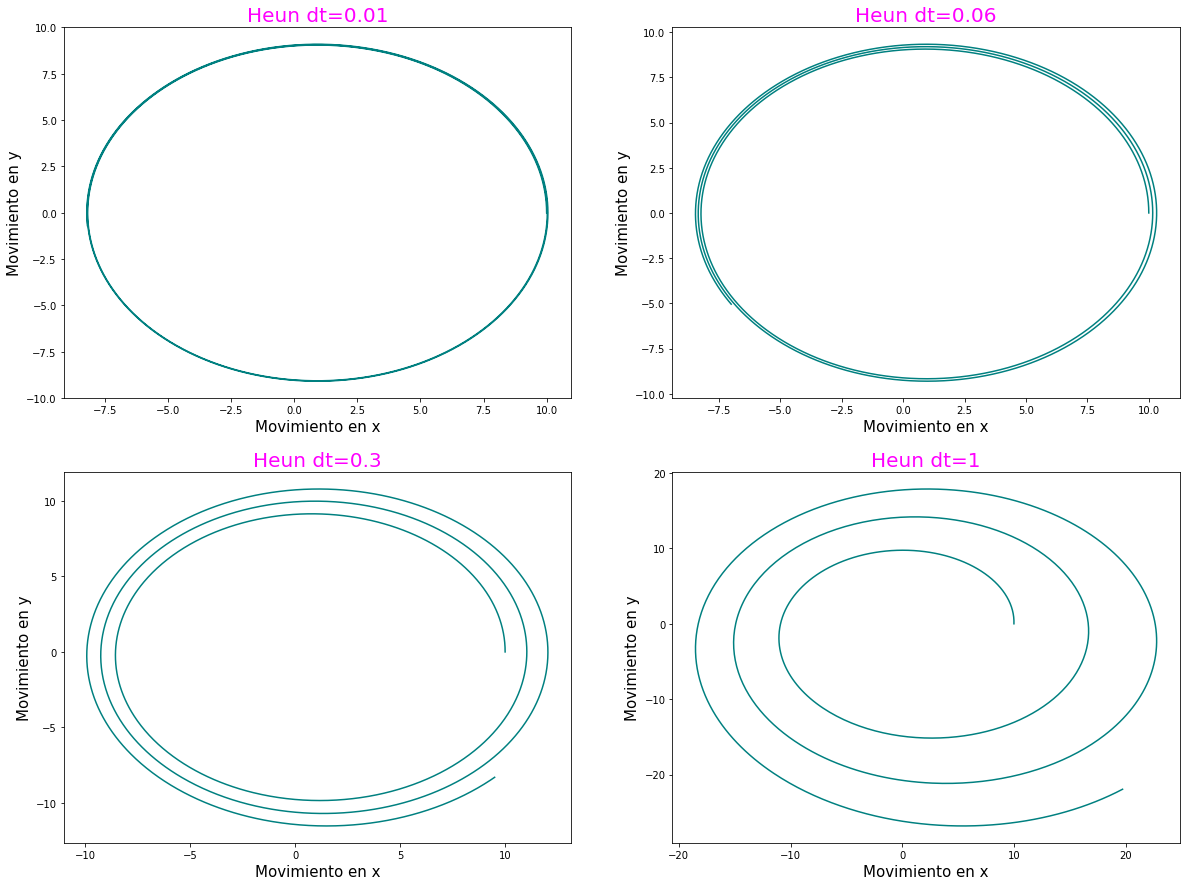

In [215]:
# se define el estado, la ecuacion de movimiento y las condiciones iniales

estado = np.array([10,0,0,0.3])

a = ecuacionDeMovimiento(estado)

e0 = np.array([10.0,0,0,0.3])

# se crean distintos solvers para disitntos dt

g= solveHeun(e0,a,0.01,860)

h = solveHeun(e0,a,0.06,860)

i= solveHeun(e0,a,0.3,860)

j = solveHeun(e0,a,1,860)

# ploteando 

fig, ax = plt.subplots(figsize = (20,15), nrows=2, ncols = 2)

ax[0,0].plot(g[:,0],g[:,1], c='teal')                        # este slicing indica que solo se están graficando las columnas que corresponden a x e y
ax[0,0].set_title('Heun dt=0.01', size=20, color='magenta')
ax[0,0].set_xlabel('Movimiento en x', size=15)
ax[0,0].set_ylabel('Movimiento en y', size=15)

ax[0,1].plot(h[:,0],h[:,1], c='teal')
ax[0,1].set_title('Heun dt=0.06', size=20, color='magenta')
ax[0,1].set_xlabel('Movimiento en x', size=15)
ax[0,1].set_ylabel('Movimiento en y', size=15)


ax[1,0].plot(i[:,0],i[:,1], c='teal')                        
ax[1,0].set_title('Heun dt=0.3', size=20, color='magenta')
ax[1,0].set_xlabel('Movimiento en x', size=15)
ax[1,0].set_ylabel('Movimiento en y', size=15)

ax[1,1].plot(j[:,0],j[:,1], c='teal')
ax[1,1].set_title('Heun dt=1', size=20, color='magenta')
ax[1,1].set_xlabel('Movimiento en x', size=15)
ax[1,1].set_ylabel('Movimiento en y', size=15)




[10.   0.   0.   0.3]
[10.   0.   0.   0.3]
[10.   0.   0.   0.3]
[10.   0.   0.   0.3]


Text(0, 0.5, 'Movimiento en y')

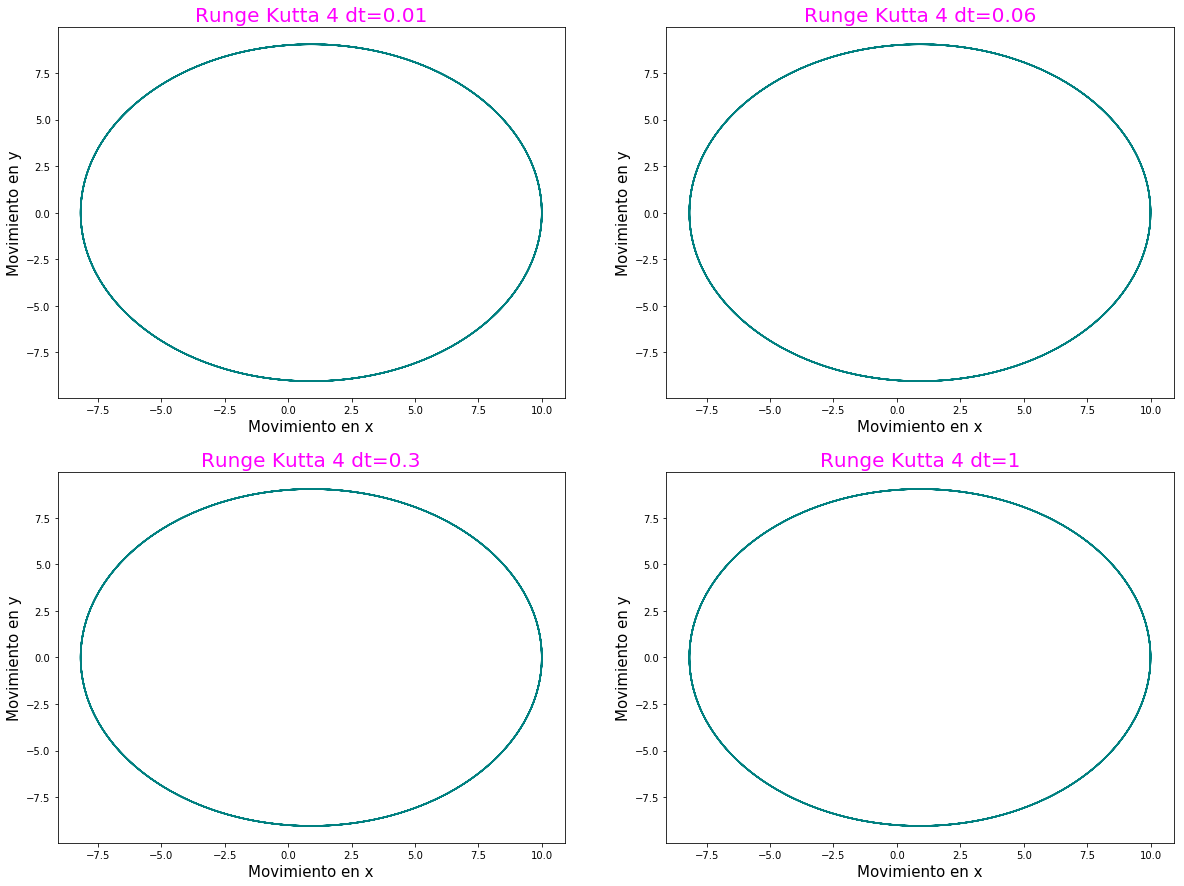

In [216]:
# se define el estado, la ecuacion de movimiento y las condiciones iniales

estado = np.array([10,0,0,0.3])

a = ecuacionDeMovimiento(estado)

e0 = np.array([10.0,0,0,0.3])

# se crean distintos solvers para disitntos dt

k= solveRK4(e0,a,0.01,860)

l = solveRK4(e0,a,0.06,860)

m= solveRK4(e0,a,0.3,860)

n = solveRK4(e0,a,1,860)

# ploteando 

fig, ax = plt.subplots(figsize = (20,15), nrows=2, ncols = 2)

ax[0,0].plot(k[:,0],k[:,1], c='teal')
ax[0,0].set_title('Runge Kutta 4 dt=0.01', size=20, color='magenta')
ax[0,0].set_xlabel('Movimiento en x', size=15)
ax[0,0].set_ylabel('Movimiento en y', size=15)

ax[0,1].plot(l[:,0],l[:,1], c='teal')
ax[0,1].set_title('Runge Kutta 4 dt=0.06', size=20, color='magenta')
ax[0,1].set_xlabel('Movimiento en x', size=15)
ax[0,1].set_ylabel('Movimiento en y', size=15)

ax[1,0].plot(m[:,0],m[:,1], c='teal')
ax[1,0].set_title('Runge Kutta 4 dt=0.3', size=20, color='magenta')
ax[1,0].set_xlabel('Movimiento en x', size=15)
ax[1,0].set_ylabel('Movimiento en y', size=15)

ax[1,1].plot(n[:,0],n[:,1], c='teal')
ax[1,1].set_title('Runge Kutta 4 dt=1', size=20, color='magenta')
ax[1,1].set_xlabel('Movimiento en x', size=15)
ax[1,1].set_ylabel('Movimiento en y', size=15)

In [0]:
#import sys
#del sys.modules['metodos']
#import numpy as np
#import matplotlib.pyplot as plt
#from metodos import *

def graficaEtotal(e0,ecMov,dt,T):
  
  w = solveRK4(e0,ecMov,dt,T)         # se obtiene la matriz que entrega el solver
  
  pasos=np.arange(0,int(T/dt),1)
  tiempo=dt*pasos
  tamaño=w.shape
  Nfilas=w.shape[0] 
             
  
  
  energia = np.zeros(Nfilas)          # para luego crear este vector con la misma cantidad de ceros que numero de filas
                                      # y así rellenarlo después
  
  for i in np.arange(0,Nfilas,1):  
    energia[i]=energiaTotal(w[i,0], w[i,1], w[i,2], w[i,3]) # se extraen los valores de x,y,vx,vy respectivamente de la columna i
                                                            # y así rellenar la posicion i del arrreglo de ceros inicial con el valor obtenido
  
  plt.figure(figsize=(7,5))
  plt.plot(tiempo,energia, c='teal')
  plt.title('Energía total según RK4', size=20, color='magenta')
  plt.xlabel('Tiempo', size=15)
  plt.ylabel('Energía', size=15)
  plt.axhline(0,color='black')
  plt.axvline(0,color='black')  

[10.   0.   0.   0.3]
10.0
9.045340273025182


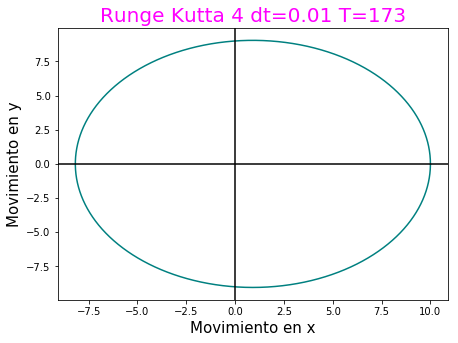

In [203]:

# graficando trayectoria de una vuelta con rk4

estado = np.array([10,0,0,0.3])

a = ecuacionDeMovimiento(estado)

e0 = np.array([10.0,0,0,0.3])

b= solveRK4(e0,a,0.01,172)

print(b[:,0].max())
print(b[:,1].max())


plt.figure(figsize=(7,5))
plt.plot(b[:,0],b[:,1], c='teal')
plt.title('Runge Kutta 4 dt=0.01 T=173', size=20, color='magenta')
plt.xlabel('Movimiento en x', size=15)
plt.ylabel('Movimiento en y', size=15)
plt.axhline(0,color='black')
plt.axvline(0,color='black')



[10.   0.   0.   0.3]


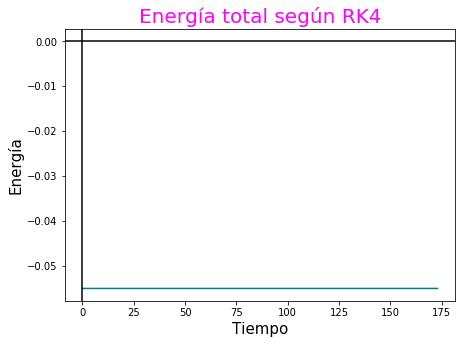

In [205]:
#import sys
#del sys.modules['metodos']
#import numpy as np
#import matplotlib.pyplot as plt
#from metodos import *

# graficando la energía total del sistema

estado = np.array([10,0,0,0.3])

a = ecuacionDeMovimiento(estado)

e0 = np.array([10.0,0,0,0.3])


graficaEtotal(e0,a,0.01,173)